# Recursive Sorting And Data Structures

Now that we have the basics for sorting down, let's move onto some more advanced algorithms.  As said in the last section, these algorithms will rely on recursion to sort the elements of the array in question.  Unfortunately, we will not be able to present an analysis of these algorithms in this section, for that we will require a new set of analysis tools, which we will see in the next section.

## Merge Sort

The merge sort algorithm will be the first we see that gets used often in industry.  It is of a class of algorithms called divide and conquer, where first we divide the input up into parts, then process the input, then glue the input back together.  The merge sort algorithm does much more than just give us a new way to sort, it gives us a new framework for how to _think_ about computation and programming.  Let's look at an implementation:

In [4]:
import random

def merge(left: list, right: list) -> list:
    left_index = 0
    right_index = 0
    final = []
    while left_index < len(left) and right_index < len(right):
        left_element = left[left_index]
        right_element = right[right_index]
        if left_element <= right_element:
            final.append(left_element)
            left_index += 1
        else:
            final.append(right_element)
            right_index += 1
    final += left[left_index:]
    final += right[right_index:]
    return final

def merge_sort(arr):
    if len(arr) == 1 or len(arr) == []:
        return arr
    mid_point = len(arr)//2
    
    left = merge_sort(arr[:mid_point])
    right = merge_sort(arr[mid_point:])
    return merge(left, right)

def test_merge_sort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert merge_sort(array) == sorted_array
    
test_merge_sort()

While at first this code may seem kinda nuts, like why would this possibly work?  But once we analyze it, it should at least be somewhat clearer.

Let's begin with the steps we from last time - 

1. Find the point of comparison
2. Find the swap

You may be tempted to look at the merge_sort procedure for this, but alas there is no comparison or swapping here.  The actual sorting all happens in the `merge` function defined first.  

Since the comparison and swap happen pretty close by it's easier to just show you the merge function and then point out where comparison and swap are happening:

```python
1  def merge(left: list, right: list) -> list:
2     left_index = 0
3     right_index = 0
4     final = []
5     while left_index < len(left) and right_index < len(right):
6         left_element = left[left_index]
7         right_element = right[right_index]
8         if left_element <= right_element:
9             final.append(left_element)
10            left_index += 1
11        else:
12            final.append(right_element)
13            right_index += 1
14    final += left[left_index:]
15    final += right[right_index:]
16    return final
```

The key to understanding the `merge` function is understanding _what it returns_.  As you can see `merge` returns `final`.  The `final` array stores the elements from the two subarrays, `left` and `right` in _sorted order_.  So as we append to final, we do so such that elements are only appended if they are done so such that the _next smallest element from either array_ is added.  This is how we guarantee that the returned array `final` is sorted.  With that as context, let's look at the comparison.

On line 8, 11, 14 and 15 the comparison happens.  

Let's start with line 8 since it's the most explicit.

We have:

```python
if left_element <= right_element:
    final.append(left_element)
    left_index += 1
else:
    final.append(right_element)
    right_index += 1
```

Here we append the left element to the final array since it is less than ther right element.  On line 11 we see the else.  In this case, the right element is less, thus it gets appended to final.  The next comparison happens implicitly on lines 14 and 15:

```python
final += left[left_index:]
final += right[right_index:]
```

This is because we _start_ with the left_index, so implicitly we are assuming that we've already made all the possible comparisons between the left and right sub arrays.  In fact, at this point of the code only `left` or `right` will be non-empty as the while loop in line 5 continues until _at least_ one of the sub-arrays is empty.  If there are remaining elements to append to the final array they will _either_ be in the left or right subarray.  Since there is no way to tell ahead of time which one will be non-empty we simply include both statements.  We could be explicit about this with a conditional, but appending the contents of an empty array to an array is just the original array, so there is no harm in just having _both_ statements in the main context of the function.

Finally, we have to find the swaps.  The swaps occur implicitly at the point of appending to the final array.  So technically they happen here:

```python
if left_element <= right_element:
    final.append(left_element)
    left_index += 1
else:
    final.append(right_element)
    right_index += 1
```

And here:

```python
final += left[left_index:]
final += right[right_index:]
```

We 'swap' implicitly by appending to a new array in sorted order, rather than swapping in place in the original array.  It is possible to rewrite merge sort such that it does explicit swaps rather than creating a new `final` array.  Doing this inplace would be more space efficient, but would make the code less readible which is why the above implementation was the one chosen.  

Now that we've talked about the comparison and swapping, which shows us this is at least a _candidate_ for a sorting algorithm, let's talk about the `merge_sort` function:

```python
1 def merge_sort(arr):
2     if len(arr) == 1 or len(arr) == []:
3         return arr
4     mid_point = len(arr)//2
5    
6     left = merge_sort(arr[:mid_point])
7     right = merge_sort(arr[mid_point:])
8     return merge(left, right)
```

This is where the _divide and conquer_ part of the algorithm happens.  Here we have a midpoint which _divides_ the array into two equal or _nearly_ equal sub-arrays and then sends them through a set of recursive calls.  Notice that we don't return up back through the recursive call until after we've merged, thus we have a guarantee that any given left and right subarrays will _always_ be sorted by the time they get to line 8.  

If you recall from last lecture when we talked about the recursive implementation of fibonacci, it was possible to write down each of the recursive calls like so:

![](fib_1.png)
![](fib_2.png)
![](fib_3.png)
![](fib_4.png)
![](fib_5.png)
![](fib_fin.png)

As you can see the way the recursion works is by evaluating the bottom of the recursive 'tree' structure and moving all the way to the 'top', where the last call returns the answer.  The same thing happens when we sort an array using merge sort:

![](mergesort_1.png)
![](mergesort_2.png)
![](mergesort_3.png)
![](mergesort_4.png)
![](mergesort_5.png)

Here we explicitly divide into subarrays, merge and then recurse up to the next call.  This strategy of divide, conquer and recurse up ends up making a _very_ fast algorithm.

Let's plot the running times over the algorithms we've seen so far as the input size varies:

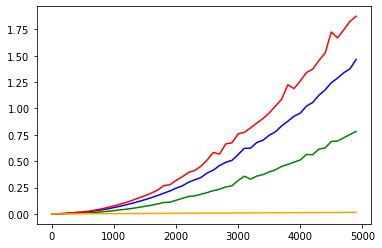

In [7]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def simple_sort(arr: list) -> list:
    for i in range(len(arr)):
        for j in range(len(arr)):
            if arr[i] < arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

def insertion_sort(arr: list) -> list:
    for j in range(1, len(arr)):
        pivot = arr[j]
        i = j - 1
        while (i >= 0) and (arr[i] > pivot):
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = pivot
    return arr

def selection_sort(arr: list) -> list:
    index = 0
    while index < len(arr):
        pivot = arr[index]
        j = index
        smallest = arr[j]
        smallest_index = j
        while j < len(arr):
            if arr[j] < smallest:
                smallest = arr[j]
                smallest_index = j
            j += 1
        arr[index] = smallest
        arr[smallest_index] = pivot
        index += 1
    return arr

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    selection_sort_rt = []
    insertion_sort_rt = []
    simple_sort_rt = []
    merge_sort_rt = []
    measurements = [
        selection_sort_rt,
        insertion_sort_rt,
        simple_sort_rt,
        merge_sort_rt
    ]
    sorting_algorithms = [
        selection_sort, 
        insertion_sort, 
        simple_sort, 
        merge_sort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(5000)

colors = ["blue", "green", "red", "orange"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue = selection sort
* green = insertion sort
* red = simple sort 
* orange = merge sort

As you can see merge sort performs the best, and by a lot.  That's because the running time for merge sort is _orders of magnitude faster_, asymptotically.  

Next, let's look at another sorting algorithm that typically gets used in industry, quick sort.  Quick sort is also a divide and conquer algorithm therefore it has a similar implementation:

In [1]:
import random
def quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = arr[0]
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return quicksort(less)+equal+quicksort(greater)

def test_quicksort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert quicksort(array) == sorted_array
        
test_quicksort()

Here the swap's and comparisons appear in one block so we'll just show the block and point to each.

```python
for elem in arr:
    if elem < pivot:
        less.append(elem)
    elif elem == pivot:
        equal.append(elem)
    else:
        greater.append(elem)
```

The flow of control of the if/elif/else are the comparisons, pretty obviously.  And the appends to the three different arrays the 'swaps'. That's because the pivot partitions the larger array into three seperate groups.  And then they all get 'glued' together in the return statement:

```python
return quicksort(less)+equal+quicksort(greater)
```

As you can see there is no explicit divide and conquer 'framework'. And we don't segregate the computational component and the sorting component.  It all just happens contiguously.  By doing 'less work' - fewer function calls, fewer iterations, and just less overall, quicksort is kind of like a very 'sparse' version of merge sort.  

Next, let's do a performance comparison between quick sort and merge sort:

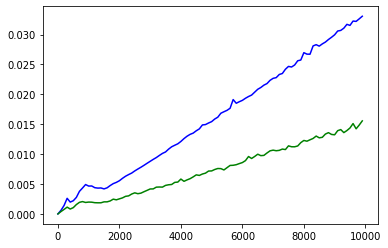

In [28]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    return [random.randint(0, 50000000) for _ in range(size)]

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    merge_sort_rt = []
    quicksort_rt = []
    measurements = [
        merge_sort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        merge_sort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(10000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue - merge sort
* green - quick sort

As you can see, quick sort is typically somewhat faster than merge sort.  Thus it is the most often used algorithm in industry.  That said, there are certain instances when merge sort will be faster.  These are subject to computation constraints, array specifics and other factors beyond the scope of this text.

Before we leave this section, let's talk a bit more about quick sort.  There is one line in the implementation that's important, that we did not talk about at all - the pivot.  We arbitrarily chose the front of the array.  But is that the best choice?  

Consider an array that is in reverse sorted order, if we always choose the first element as pivot then won't everything end up in less?  YUP.  So our 'partition' will always be _very lopsided_.  This means that quicksort will always perform kinda slow.  Let's see if it makes quick sort worse than merge sort:

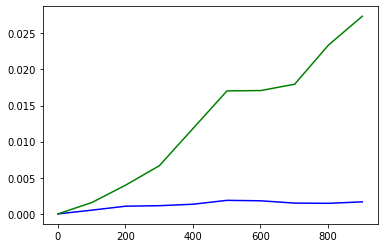

In [6]:
import random
import matplotlib.pyplot as plt
import time

def generate_array(size):
    array = [random.randint(0, 50000000) for _ in range(size)]
    return sorted(array, reverse=True)

def measure_sort(array, sorting_algorithm):
    tmp_array = array[:]
    start = time.time()
    sorting_algorithm(tmp_array)
    return time.time() - start

def generate_running_times(max_size):
    merge_sort_rt = []
    quicksort_rt = []
    measurements = [
        merge_sort_rt,
        quicksort_rt
    ]
    sorting_algorithms = [
        merge_sort,
        quicksort
    ]
    for size in range(1, max_size, 100):
        array = generate_array(size)
        for index, sorting_algorithm in enumerate(sorting_algorithms):
            measurements[index].append(measure_sort(array, sorting_algorithm))
    array_sizes = list(range(1, max_size, 100))
    return array_sizes, measurements
        
x, ys = generate_running_times(1000)

colors = ["blue", "green"]
for color_index, y in enumerate(ys):
    plt.plot(x, y, color=colors[color_index])
plt.show()

In the above graph:

* blue - merge sort
* green - quick sort

As you can see, quick sort does _way worse_.  This is because of the problem we talked about.  So our choice of partition matters _a lot_.  What can we do about this?  How can we change the pivot to always give us a good split?  One naive approach for improvement would be to choose a random pivot:

In [7]:
import random

def quicksort(arr):
    if len(arr) == 1 or len(arr) == 0:
        return arr
    else:
        pivot = random.choice(arr)
        less = []
        equal = []
        greater = []
        for elem in arr:
            if elem < pivot:
                less.append(elem)
            elif elem == pivot:
                equal.append(elem)
            else:
                greater.append(elem)
        return quicksort(less)+equal+quicksort(greater)

def test_quicksort():
    for _ in range(1000):
        array = [random.randint(0, 500) for _ in range(1000)]
        sorted_array = array[:]
        sorted_array.sort()
        assert quicksort(array) == sorted_array
        
test_quicksort()

This at least will do better than choosing the first element when the array is reverse sorted.  In fact, the chance of that happening is something we can calculate!  We can use binomial random variable to help us figure this out since the choice of the pivot will now be independent and there will be N trials!  

Our formula for the binomial random variable is:

$$ {n \choose k} p^{k} * q^{n - k} $$

Now there will be $log\text{ }n$ calls on average to `quicksort` and there will be a $\frac{1}{r}$ probability that the first element is chosen as the pivot.  Here $r$ is the size of the subarray being considered for the recursive call.

Thus the updated formula will be:

$$ {log\text{ }n \choose 1} \frac{1}{r} * \frac{(r-1)^{n - 1}}{r^{n - 1}} $$

For the probability of choosing _any_ given position for any call to `quicksort` during sorting.

Since the size of the array is variable in general, we can't _really_ say better than that.  It would be pretty tough to predict the split of _each_ sub array.  So unfortunately this is the best we can do.